In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('XXXXXXXXXXXXXX')

In [5]:
df = df.set_index('XXXXXXXXXXX')

In [7]:
df['Convert'].value_counts()

0    605804
1       816
Name: Convert, dtype: int64

In [11]:
# dividing data into training and testing

In [10]:
class1 = df[df['Convert'] == 1]

In [11]:
class0 = df[df['Convert'] == 0].sample(frac = 0.07, random_state = 55)

In [12]:
df1 = pd.concat([class0, class1], axis = 0)

In [13]:
X = df1.drop(['Convert'], axis = 1)

In [14]:
y = df1['Convert']

In [15]:
# training half
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test =train_test_split(X,y , test_size=0.5, random_state=5, stratify = y)

In [16]:
y_train.value_counts()

0    21203
1      408
Name: Convert, dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
trainedscaler = scaler.fit(X_train)

In [44]:
X_train_scaled = trainedscaler.transform(X_train)
X_test_scaled = trainedscaler.transform(X_test)

In [45]:
# comparison of scaling performance
pd.DataFrame(X_train_scaled).describe() - pd.DataFrame(X_test_scaled).describe()

0          1         2         3         4          5         6    \
count  0.000000   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
mean  -0.010218  -0.008704 -0.019327 -0.002269 -0.017912  -0.001627 -0.006016   
std    0.006957   0.034182 -0.049131  0.007691 -0.006945  -0.056575 -0.008490   
min    0.000000   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
25%    0.000000   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000   
50%    0.000000   0.000000  0.000000  0.000000  0.000000   0.000000 -0.011207   
75%    0.000000   0.000000 -0.191073 -0.018521  0.000000   0.000000 -0.022413   
max    4.738327  34.446265 -2.292878  2.055871  0.297761 -42.236359 -1.333579   

             7         8         9    ...        135       136       137  \
count   0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000   
mean   -0.006746  0.002034 -0.009686  ...   0.008187 -0.007746 -0.003416   
std    -0.048284  0.055685  0.004698  ...   0.181611  0.006615  0.054988   
min     0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000   
25%     0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000   
50%    -0.094608  0.000000 -0.033723  ...   0.000000  0.000000  0.000000   
75%     0.000000  0.000000 -0.033723  ...   0.000000  0.000000  0.000000   
max    10.596107  5.626039 -3.810644  ...  22.411713  2.209824 -0.374729   

             138        139        140       141       142        143  \
count   0.000000   0.000000   0.000000  0.000000  0.000000   0.000000   
mean   -0.007048  -0.003346   0.004149 -0.010814 -0.003064   0.016105   
std     0.161423  -0.376970  -0.053668 -0.002606 -0.016739   0.485511   
min     0.000000   0.000000   0.000000  0.000000  0.000000  -0.510315   
25%     0.000000   0.000000   0.000000  0.000000  0.000000   0.000000   
50%     0.000000   0.000000   0.000000  0.000000  0.000000   0.000000   
75%     0.000000   0.000000   0.000000  0.000000  0.000000   0.000000   
max    38.868070 -70.185884 -31.642413  1.527472  9.029156  54.992071   

             144  
count   0.000000  
mean    0.009994  
std     0.248175  
min     0.012738  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max    42.368016  

[8 rows x 145 columns]

In [46]:
# KPCA WITH anmaly included

In [47]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 20, n_jobs = -1, kernel = 'rbf')

In [48]:
kpcamodel = kpca.fit(X_train_scaled)

In [51]:
X_train_kpca = kpcamodel.transform(X_train_scaled)
X_test_kpca = kpcamodel.transform(X_test_scaled)

In [59]:
pd.DataFrame(X_train_kpca).to_csv('XXXX/xtrainkpca.csv')
pd.DataFrame(X_test_kpca).to_csv('XXXXX/xtestkpca.csv')

In [125]:
#examine explained variance
explained_variance = np.var(X_test_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

In [126]:
explained_variance_ratio

array([0.34241196, 0.12221622, 0.07526855, 0.05690627, 0.0465885 ,
       0.03810805, 0.03688764, 0.03162522, 0.02944003, 0.02850278,
       0.02636703, 0.02100396, 0.02136184, 0.01988115, 0.01842952,
       0.01795207, 0.0171634 , 0.01701207, 0.01627057, 0.01660315])

In [61]:
from sklearn.svm import OneClassSVM

In [172]:
from sklearn.svm import OneClassSVM
model = OneClassSVM()

In [174]:
train_pca = pd.concat([pd.DataFrame(X_train_kpca), y_train], axis =1)

In [175]:
test_pca =pd.concat([pd.DataFrame(X_test_kpca), y_test], axis =1)

In [177]:
train_0 = train_pca[train_pca['Convert']==0]
train_1 = train_pca[train_pca['Convert']==1]

In [181]:
X_train_0 = train_0.drop('Convert', axis =1)
X_train_1 = train_1.drop('Convert', axis =1)

In [210]:
result = model.fit(X_train_0)

In [214]:
y_pred = result.predict(X_train_1)

In [216]:
# anomaly detection produces "anomaly" as "-1", normal as "1", so we need to convert them back to 0 and 1
y_pred = np.where(y_pred == 1, 0, 1)

In [217]:
y_pred
# We can see that there are a lot of "0", which is not correct because the test set we leave out is 100% outliers

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,

In [202]:
from sklearn.metrics import confusion_matrix

In [203]:
confusion_matrix(y_train, y_pred)

array([[10603, 10600],
       [  205,   203]], dtype=int64)

### we can see it almost has no prediction power, everything is just splited by half, let's try inspecting the problem with visualization:

In [218]:
# graphing section

In [237]:
plotdata = pd.concat([train_pca.iloc[:, :3], train_pca['Convert']], axis =1)

In [238]:
plotdata.columns = ["pca0", 'pca1', 'pca2', 'Y']

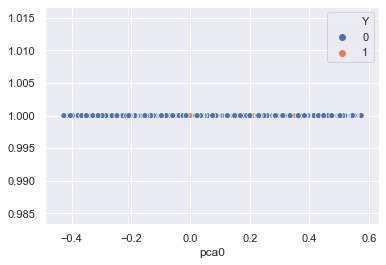

In [64]:
# 1D Visualization
ax = sns.scatterplot(x="pca0", y=1, data=plotdata, hue = 'Y')

In [60]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [1]:
# 2D Visualization

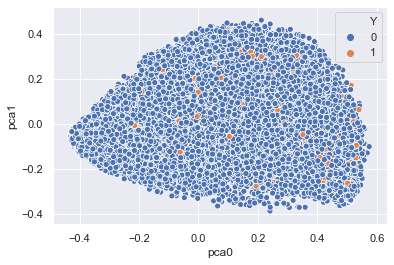

In [249]:
ax = sns.scatterplot(x="pca0", y="pca1", data=plotdata, hue = 'Y')

In [ ]:
# 3D visualization

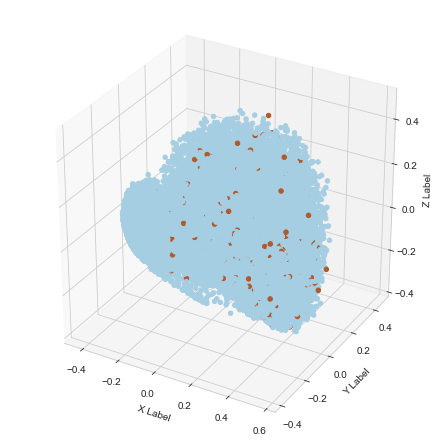

In [32]:
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = plotdata['pca0']
y = plotdata['pca1']
z = plotdata['pca2']


g = ax.scatter(x, y, z, c=plotdata['Y'], marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
#legend = ax.legend(*g.legend_elements(), loc="lower center", title="X Values", borderaxespad=-10, ncol=4)
#ax.add_artist(legend)

plt.show()

In [22]:
import plotly.express as px

In [23]:
plotdata = pd.concat([df.iloc[:, :3], y_train], axis =1)

In [24]:
plotdata.columns = ["pca0", 'pca1', 'pca2', 'Y']
plotdata

pca0      pca1      pca2  Y
0      0.440670  0.257185 -0.124133  0
1      0.115333  0.379931 -0.102332  0
2     -0.143652  0.040222 -0.079228  0
3      0.318175  0.135377  0.253964  0
4     -0.035418  0.342627 -0.112217  0
...         ...       ...       ... ..
21606 -0.153316  0.045999  0.109117  0
21607  0.074244  0.117470  0.410679  0
21608 -0.310580 -0.181123  0.170098  0
21609  0.124046  0.214578 -0.063808  0
21610 -0.153453 -0.241895 -0.070010  0

[21611 rows x 4 columns]

In [25]:
# plotly interactive 3d plot, won't work on Github
fig = px.scatter_3d(plotdata, x='pca0', y='pca1', z='pca2',
              color='Y', opacity=0.7)
fig.show()